# Домашнее задание

В этом домашнем задании предлагаем вам попрактиковаться в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [33]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

df.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

<Axes: xlabel='timestamp'>

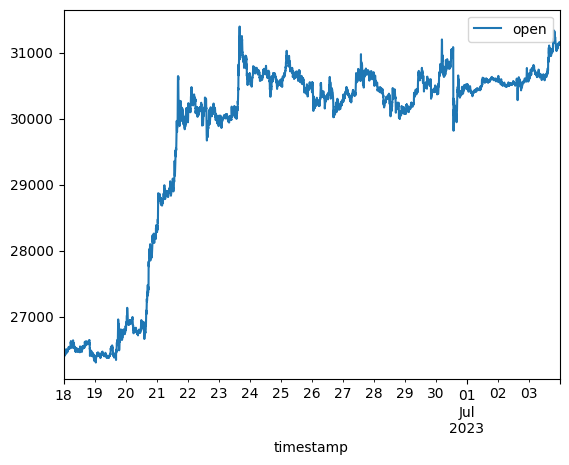

In [34]:
df = df[['open']]

df.plot()

Проделайте следующие шаги:

* Разбейте данные на тренировочную и тестовую часть. В тест отправьте 15% данных

* Извлеките лаговые признаки

* Извлеките агрегированные признаки (средняя стоимость за день, час)

Рекомендуется использовать функцию preprocess_data с вебинара (однако, надо будет незначительно ее поменять, исходя из данных задачи).

Задайте гиперпараметры по умолчанию (в функции preprocess_data, если будете использовать ее):
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [35]:
lag_start = 5
lag_end = 20
test_size = 0.15

In [36]:
def code_mean(df, cat_feature, real_feature):
    return dict(df.groupby(cat_feature)[real_feature].mean())

In [37]:
def create_lag_features(df, lag_start, lag_end):
    for i in range(lag_start, lag_end + 1):
        df[f'lag_{i}'] = df['open'].shift(i)
    df.dropna(inplace=True)
    return df

In [38]:
def no_df_leak(df, test_size):
    df['hour'] = df.index.hour
    train_size = int(df.shape[0] * (1 - test_size))
    df['hour_average'] = list(map(code_mean(df.iloc[:train_size], 'hour', 'open').get, df.hour))
    df.drop(['hour'], axis=1, inplace=True)
    return df

In [39]:
df = create_lag_features(df, lag_start, lag_end)
df = no_df_leak(df, test_size)
train_size = int(df.shape[0] * (1 - test_size))

In [40]:
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

X_train = df_train.drop(['open'], axis=1)
X_test = df_test.drop(['open'], axis=1)
y_train = df_train['open']
y_test = df_test['open']

In [41]:
X_test.head()

,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,hour_average
timestamp,,,,,,,,,,,,,,,,,
2023-07-01 14:35:00,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,30588.68,29499.247178
2023-07-01 14:40:00,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,30564.62,29499.247178
2023-07-01 14:45:00,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,30602.53,29499.247178
2023-07-01 14:50:00,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,30613.24,29499.247178
2023-07-01 14:55:00,30565.65,30577.60,30556.71,30556.51,30544.91,30543.00,30564.98,30565.00,30554.31,30582.66,30555.05,30559.84,30559.30,30583.99,30585.03,30590.10,29499.247178


Обучите линейную регрессию с гиперпараметрами по умолчанию на тренировочных данных и вычислите ошибку MAE на тестовых данных.

Чему она получилась равна? (Ответ округлите до целого числа).

Также нарисуйте график правильного ответа и прогноза на тесте.

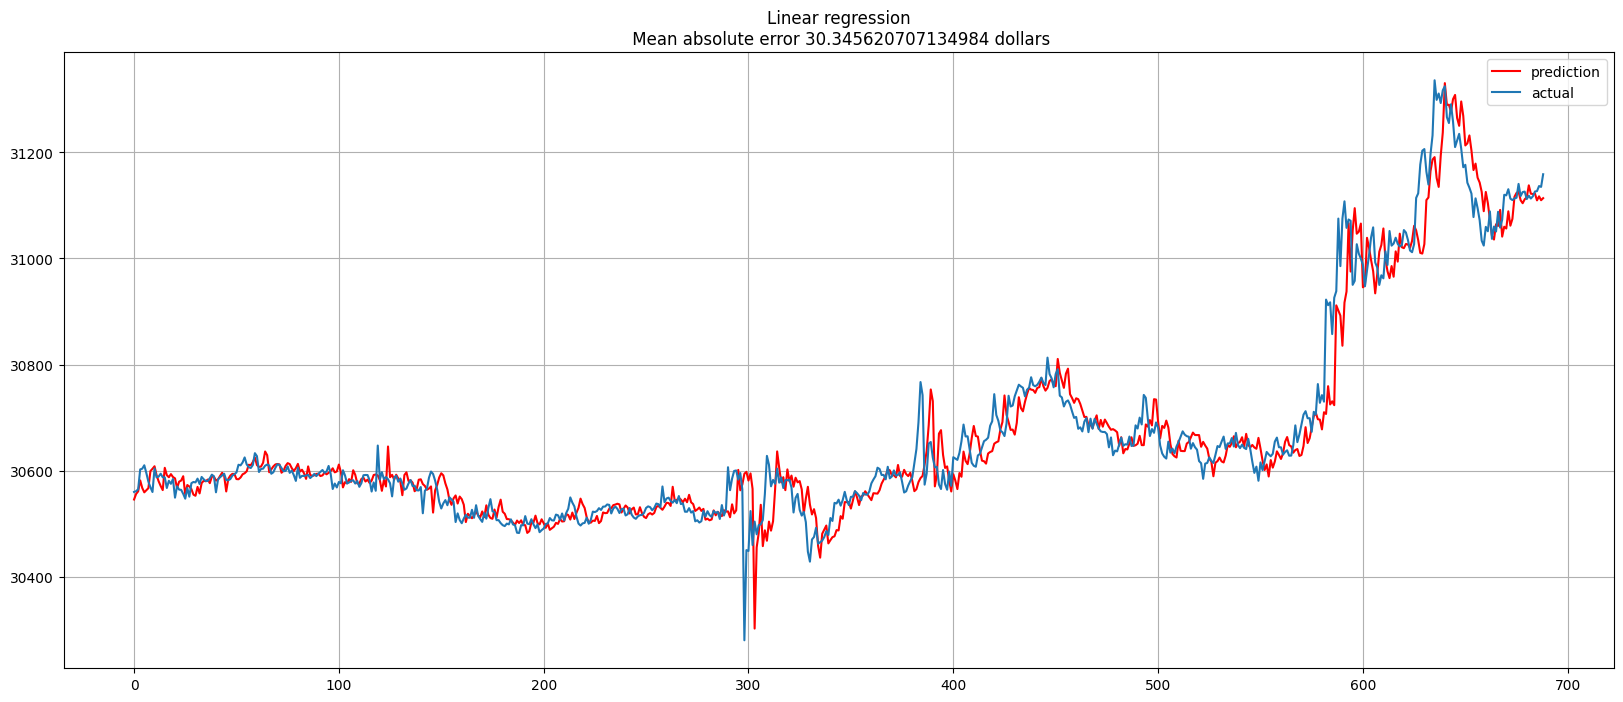

In [43]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

plt.figure(figsize=(20, 8))
plt.plot(preds, 'r', label='prediction')
plt.plot(y_test.values, label='actual')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} dollars');

Попробуйте подобрать гиперпараметры `lag_start`, `lag_end`, а также придумать новые полезные агрегрированные признаки для улучшения качества прогноза.

Пропорции разбиения (в тесте 15% данных) не трогайте. Ошибку MAE все так же считайте на тесте.

In [ ]:
# your code here